# INTRODUCTION TO CLASSIFICATION

## Course Overview 

Upon completion of this study unit, you should be able to:

- Distinguish between Classfication and Regression

- Identify real world examples of classification

- Distinguish between binary and Multi-class problems

- List types of classification algorithms 

- Build different classification algorithms using SKLearn

- Evaluation and compare the performance of different classification models 



Classification is a sub-category of supervised Machine Learning methods where data points are grouped into classes as output, using a decision boundary to separate each class.
In Classification, we predict the category a data point belongs to ie. Classification algorithms are used to predict labels/classes. Examples;
* Spam Detection
* Churn Prediction
* Sentiment Analysis
* Dog Breed Detection

### TYPES OF CLASSIFICATION TASK

* Binary classification eg. e-mail spam detection (1 ->spam; or 0→not spam), biometric identification, whether a customer will default or Not
* Multi-class classification eg. digit recognition (where classes go from 0 to 9), predicting a party that wins the election,  



### Types of Classification Algorithms
- Logistic Regression         
- Naive Bayes Classifier
- Nearest Neighbor			
- Support Vector Machines
- Decision Trees				
- Boosted Trees
- Random Forest	            


## The Scikit-learn

Scikit-learn is a library in Python that provides many supervised learning and unsupervised algorithms. It’s built upon some of the packages you already familiar with, like NumPy, Pandas, and Matplotlib!

The functionality that scikit-learn provides include:

- Regression

- Classification

- Clustering

- Model selection

- Preprocessing

### Installation

The easiest way to install scikit-learn is using:

`pip install -U scikit-learn`

or 

`conda install -c conda-forge scikit-learn`


### Importing Scikit-learn Module


Some of the classsification models that can be imported from sklearn library includes:

* **Logistic Regression**: `from sklearn.linear_model import LogisticRegression`
* **K Nearest Neighbor**: `from sklearn.neighbors import KNeighborsClassifier`
* **Support Vector Machine**: `from sklearn.svm import SVC`
* **Decision Trees Classifier**: `from sklearn.tree import DecisionTreeClassifier`
* **Random Forest Classifier**: `from sklearn.ensemble import RandomForestClassifier`
* **Gradient Boost Classifier**: `from sklearn.ensemble import GradientBoostingClassifier`

## Building Classification Machine Learning Model for AXA Mansard Medical Insurance 

### Problem statement

You work as an analyst in the marketing department of a company that provides various medical insurance in Nigeria. Your manager is unhappy with the low sales volume of a specific kind of insurance. The data engeenier provides you with a sample dataset for those that visit the company webiste for medical insurance.

The dataset contains the following columns:

- User ID
- Gender
- Age
- Salary
- Purchase: An indicator of whether the users purchased (1/Positive Class) or not-purchased (0/Negative Class) a particular product.

As we must have guessed, this is a binary classification problem, with the postive class being "Purchased" and the negative class being "Not purchased".

In Machine learning, we have something called the **"No Free Lunch Theorem"**. Which simply implies that we do not try one single algorithm for a given problem and decide it is the best. We have to choose a class of algorithms(Binary classifiiers in b=this case), then train and predict on each of them, compare performance using the chosen metrics, and choose the best one. Note that one Algorithm is not always the best one across all problems.

FOr this problem, We plan to use the following classifiers to predict the classes 'Purchased' or 'not-purchased'.

- Logistic regression

- Random forest

- Naive Bayes

- XGBoost

- Support Vector Machine

### Import Python modules

We need to import some packages that will enable us to explore the data and build machine learning models

In [1]:
#Importing the required libraries
import numpy as np #for linear algebra/data preprocessing
import pandas as pd #for data preprocessing
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #for visualization

# Read the Data

In [3]:
#Reading the data as a  .csv file and checking the first 20 observations
insurance = pd.read_csv("Medical_insurance_dataset.csv")

insurance.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [5]:
#Checking the shape of the data
insurance.shape

(400, 5)


# Describing the Data and its features
We have 5  features and 400 instances/collected examples of those who want to buy medical insurance or not in this data.

Among the 5 features, 4 of them are descriptive features of the problem and the last feature is the Target column. The 3 features include `gender`, `age`, and `estimated salary` while the column `purchased` is the label/Target column in this data. Since the label has just two classes or categories (purchased (1) and not-purchased (0)), this is a binary classification problem. 





In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [9]:
insurance.describe()

,User ID,Age,EstimatedSalary
count,4.000000e+02,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000
std,7.165832e+04,10.482877,34096.960282
min,1.556669e+07,18.000000,15000.000000
25%,1.562676e+07,29.750000,43000.000000
50%,1.569434e+07,37.000000,70000.000000
75%,1.575036e+07,46.000000,88000.000000
max,1.581524e+07,60.000000,150000.000000


In [11]:
insurance.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
insurance['Purchased'].value_counts()

Purchased
not-purchased    257
purchased        143
Name: count, dtype: int64

<Axes: xlabel='Purchased'>

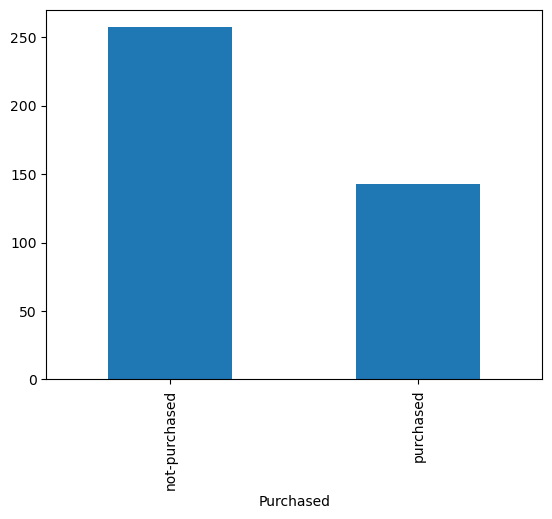

In [15]:
insurance['Purchased'].value_counts().plot(kind="bar")

## Dropping a Column/Feature not useful for prediction/Modeling

The User ID is a random number generated for every customer that comes to the company for medical insurance. Therefore, it is not useful in prediciting whether the person will buy medical insurance or not. It will hence be removed from the  data, as it is not useful for modeling.

In [17]:
#Dropping User ID column
insurance.drop(["User ID"], axis= "columns", inplace= True)

In [19]:
insurance.head(20)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased
5,Male,27,58000,not-purchased
6,Female,27,84000,not-purchased
7,Female,32,150000,purchased
8,Male,25,33000,not-purchased
9,Female,35,65000,not-purchased


Next, we transform or Encode the Target column 'Purchased' to discrete values $1$ representing purchased and $0$ representing "not-purchased".This will transform the output variable (label) to be numeric values, which is important for a machine learning model.

In [25]:
#lambda function
add2 = lambda x,y:x+y
def add(x,y):
    return x+y

In [ ]:
def bineraze(x):
    return 1 if x == 'purchased' else 0

In [29]:
(lambda x,y:x+y)(5,6)

11

In [43]:
#Mapping the values 1 and to transform the target column
insurance["Purchased"] = insurance["Purchased"].apply(lambda x: 1 if x == "purchased" else 0)

In [33]:
insurance["Purchased"]

0      not-purchased
1      not-purchased
2      not-purchased
3      not-purchased
4      not-purchased
           ...      
395        purchased
396        purchased
397        purchased
398    not-purchased
399        purchased
Name: Purchased, Length: 400, dtype: object

In [31]:
insurance["Purchased"].apply(lambda x: 1 if x == "purchased" else 0)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [37]:
True + True

2

In [41]:
(insurance["Purchased"] == "purchased").astype('int64')

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [45]:
#Reading the data again
insurance.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


# Exploratory Data Analysis

Fact generated by data exploratory will help us to know those features that can predict whether a person will purhcase medical insurance or not. Let us start by visualizing the proportion of those that want to buy medical insurance or not.

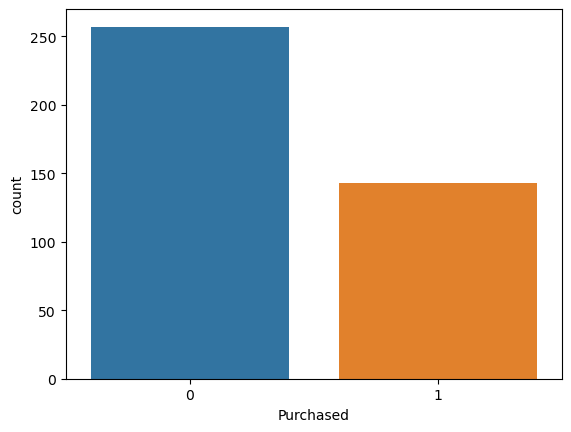

In [70]:
sns.countplot(x = "Purchased", data = insurance);

As you can see, majority of those that visit the medical insurance company did not want to buy the insurance. This is an example of class imbalanced. That is, there is no equal of proportion of those that will buy or not.

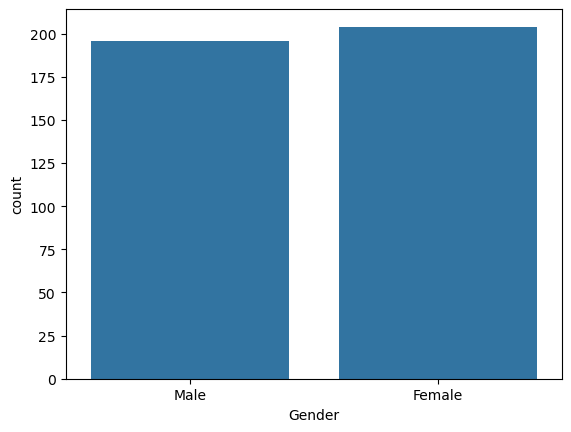

In [47]:
sns.countplot(x = "Gender", data = insurance);

The proportion of males are almost the same as females.

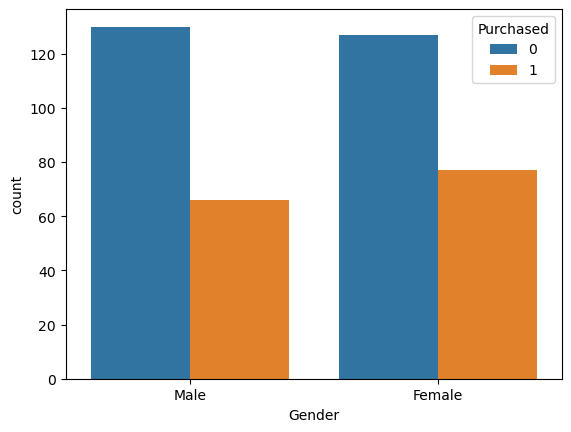

In [49]:
sns.countplot(x = "Gender" , hue = "Purchased", data = insurance);

It seems that females wanted to purchase the insurance when compare with males.

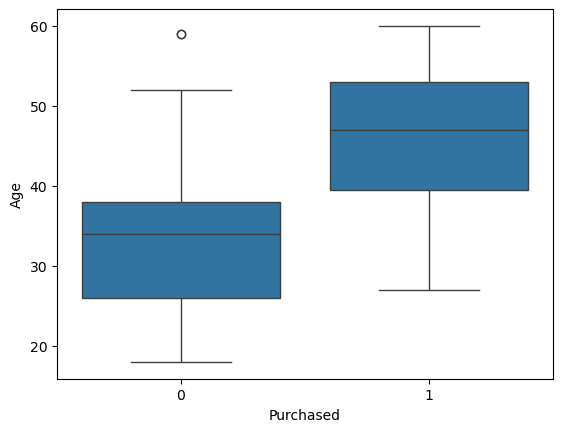

In [51]:
sns.boxplot(x = "Purchased", y = "Age", data = insurance);

From the look of things, older people purchased the insurance compared with the younger people.

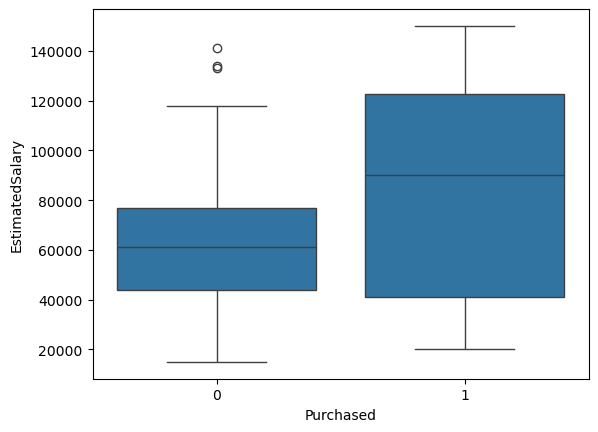

In [53]:
sns.boxplot(x = "Purchased", y = "EstimatedSalary", data = insurance);

People that earned higher salary purchased the insurance while those that earned low did not purchase the insurance. Of course, it is expected you purchase a medical insurance when you have money.

## Preprocessing

Label Encoding/Label Binarization

In [55]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
insurance["Gender"] = lb.fit_transform(insurance["Gender"])

In [57]:
insurance.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


## Model building

- Importing machine learning models

In [73]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

## Preparing the Data for modeling
- Separating features and the label from the data

Now is the time to build machine learning models for the task of predicting whether the customers will buy medical insurance or not. Therefore, we shall separate the set of features (X) from the label (Y).

In [59]:
# split data into features and target

X = insurance.drop(["Purchased"], axis= "columns") # droping the label variable (Purchased) from the data

y = insurance["Purchased"]

In [61]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

- One-hot encoding

As dicussed in Part 3, we need to create a one-hot encoding for all the categorical features in the data because some algorithms cannot work with categorical data directly. They require all input variables and output variables to be numeric. In this case, we will create a one-hot encoding for the gender feature by using `pd.get_dummies()`.

In [67]:
# pd.get_dummies(insurance["Gender"]).astype('int64')

,0,1
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In fact, `pd.get_dummies()` is very powerful to actually locate the categorical features and create a one-hot encoding for them. For example:

In [69]:
# pd.get_dummies(X)

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


We now save this result of one-hot encoding into X.

In [21]:
#X = pd.get_dummies(X)

In [22]:
#X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


- Split the data into training and test set

As discussed in A, We will split our dataset (Features (X) and Label (Y)) into training and test data by using `train_test_split()` function from the sklearn. The training set will be $80\%$ while the test set will be $20\%$. The `random_state` that is set to 1234 is for all of us to have the same set of data.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1234)

We now have the pair of training data `(X_train, y_train)` and test data `(X_test, y_test)`

- Model training

We will use the training data to build the model and then use test data to make prediction and evaluation respectively.

## Logistic regression

Let's train a Logistic regression model with our training data. We need to import the Logistic regression from the sklearn model

In [77]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

We now create an object of class `LogisticRegression()` to train the model on

In [79]:
#Instance for the logistiv regression model
logisticmodel = LogisticRegression()

logisticmodel.fit(X_train, y_train) #Fitting the train set

LogisticRegression()

`logisticmodel.fit` trained the Logistic regression model. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [82]:
logisticmodel.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

Let's save the prediction result into `logistic_prediction`. This is what the model predicted for us.

In [84]:
#Making a prediction
logistic_prediction = logisticmodel.predict(X_test)

- Model evaluation

Since we know the true label in the test set (i.e. `y_test`), we can compare this prediction with it, hence evaluate the logistic model. I have created a function that will help you visualize a confusion matrix for the logistic model and you can call on it henceforth to check the performance of any model.

In [86]:
def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

By using the `ConfusionMatrix()` function, we have:

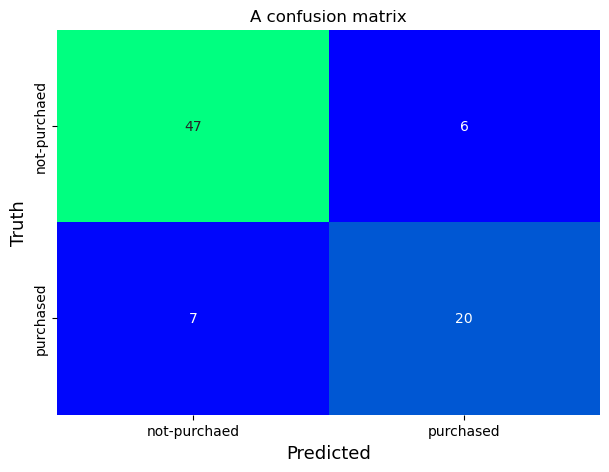

In [88]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchaed", "purchased"])

## Interpretation of the Naive model evaluation performance


There are 53 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.

There are 27 False Negative (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.

**We can check the accuracy by using:**

In [90]:
metrics.accuracy_score(y_test, logistic_prediction)

0.8375

The accuracy of the model is $83.75\%$. We cannot trust this accuracy since the data is class imbalanced. Therefore, we are going to use F1 score instead.

In [93]:
metrics.f1_score(y_test, logistic_prediction)

0.7547169811320755

As you can see from the confusion matrix and the result of F1 score, this model is not efficient to predict whether or not a customer will buy the insurance.

## Naive Bayes model

Let's train a Naive Bayes model with our training data. We need to import the Naive Model from the sklearn model

In [97]:
from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()

naivemodel.fit(X_train, y_train)

GaussianNB()

`naivemodel.fit()` trained the Naive Bayes model. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [99]:
naivemodel_prediction = naivemodel.predict(X_test)

You can call one `naivemodel_prediction`to see the prediction

In [101]:
naivemodel_prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

By using the `ConfusionMatrix()` function, we can see how the model performed:

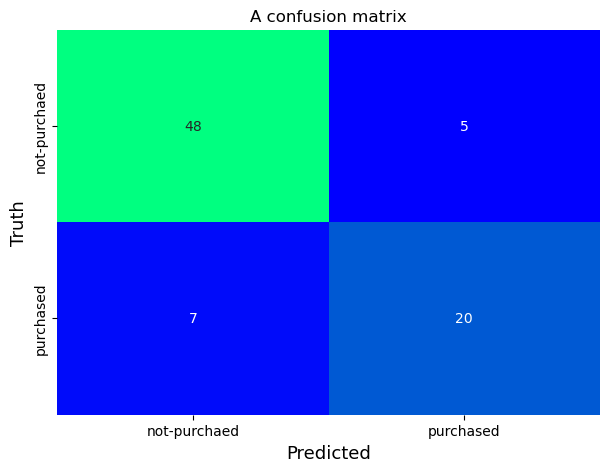

In [103]:
ConfusionMatrix(y_test, naivemodel_prediction, label= ["not-purchaed", "purchased"])

## Interpretation of the Naive model evaluation performance

There are 48 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.

There are 20 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance.

There are 7 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.

There are 5 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.

## Evaluation metrics

We are going to check the **accuracy** and **F1** score of them model. 

**We can check the accuracy by using:**

In [105]:
metrics.accuracy_score(y_test, naivemodel_prediction)

0.85

The accuracy of the model is $85\%$

**We can check the F1 score by using:**

In [107]:
metrics.f1_score(y_test, naivemodel_prediction)

0.7692307692307693

The F1 score of the model is $76.9\%$

As you can see, this model seems good in predicting whether a patient will buy insurance or not.

## Random Forest Model

Let's train a Random Forest model with our training data. We need to import the Random Forest model from the sklearn module

In [109]:
from sklearn.ensemble import RandomForestClassifier

randomforestmodel = RandomForestClassifier()

randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

`randomforestmodel.fit()` trained the Random Forest model on the training data. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [111]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

You can call one `randomforestmodel_prediction` to see the prediction

In [113]:
randomforestmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

By using the `ConfusionMatrix()` function, we can see how the model performed:

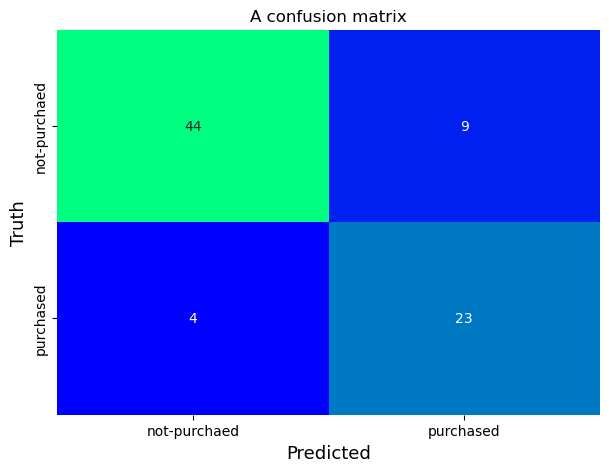

In [115]:
ConfusionMatrix(y_test, randomforestmodel_prediction, label= ["not-purchaed", "purchased"])

## Interpretation of the Random Forest model evaluation performance

There are 44 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.

There are 23 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance.

There are 4 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.

There are 9 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.

## Evaluation metrics

We are going to check the **accuracy** and **F1** score of them model.

**We can check the accuracy by using:**

In [117]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.8375

The accuracy of the model is $83.75\%$

**We can check the F1 score by using:**

In [119]:
metrics.f1_score(y_test, randomforestmodel_prediction)

0.7796610169491526

The F1 score of the model is $77.97\%$

As you can see, this model seems good in predicting whether a patient will buy insurance or not.

## Extreme Gradient Boost (XGBoost) Model

Let's train an XGBoost model with our training data. We need to import the XGBoost model from the sklearn module but before we do that, we need to install the module because it is not available in the sklearn.

## How to install XGBoost

Go to your termina and type `pip install xgboost`

`pip install xgboost`

After installation, you can now import it as follows:

In [129]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.0/124.9 MB 196.9 kB/s eta 0:10:35
   ---------------------------------------- 0.1/124.9 MB 252.2 kB/s eta 0:08:15
   ---------------------------------------- 0.1/124.9 MB 327.7 kB/s eta 0:06:21
   ---------------------------------------- 0.1/124.9 MB 361.0 kB/s eta 0:05:46
   ---------------------------------------- 0.2/124.9 MB 382.3 kB/s eta 0:05:27
   ---------------------------------------- 0.2/124.9 MB 382.3 kB/s eta 0:05:27
   ---------------------------------------- 0.2/124.9 MB 374.9 kB/s eta 0:05:33
   ---------------------------------------- 0.2/124.9 MB 374.

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


   ------------------------ -------------- 79.2/124.9 MB 499.4 kB/s eta 0:01:32
   ------------------------ -------------- 79.2/124.9 MB 494.5 kB/s eta 0:01:33
   ------------------------ -------------- 79.2/124.9 MB 494.1 kB/s eta 0:01:33
   ------------------------ -------------- 79.2/124.9 MB 494.1 kB/s eta 0:01:33
   ------------------------ -------------- 79.2/124.9 MB 494.1 kB/s eta 0:01:33
   ------------------------ -------------- 79.2/124.9 MB 494.1 kB/s eta 0:01:33
   ------------------------ -------------- 79.2/124.9 MB 489.7 kB/s eta 0:01:34
   ------------------------ -------------- 79.2/124.9 MB 489.7 kB/s eta 0:01:34
   ------------------------ -------------- 79.2/124.9 MB 489.7 kB/s eta 0:01:34
   ------------------------ -------------- 79.2/124.9 MB 489.7 kB/s eta 0:01:34
   ------------------------ -------------- 79.2/124.9 MB 489.7 kB/s eta 0:01:34
   ------------------------ -------------- 79.2/124.9 MB 489.7 kB/s eta 0:01:34
   ------------------------ ------------

In [131]:
from xgboost import XGBClassifier

xgboostmodel = XGBClassifier(use_label_encoder=False)

xgbboostmodel = xgboostmodel.fit(X_train, y_train)

C:\Users\Excellus\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:02:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


`xgboostmodel.fit()` trained the XGBoost model on the training data. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [133]:
xgbboostmodel_prediction = xgboostmodel.predict(X_test)

You can call on `xgbboostmodel_prediction` to see the prediction

In [136]:
xgbboostmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

By using the `ConfusionMatrix()` function, we can see how the model performed:

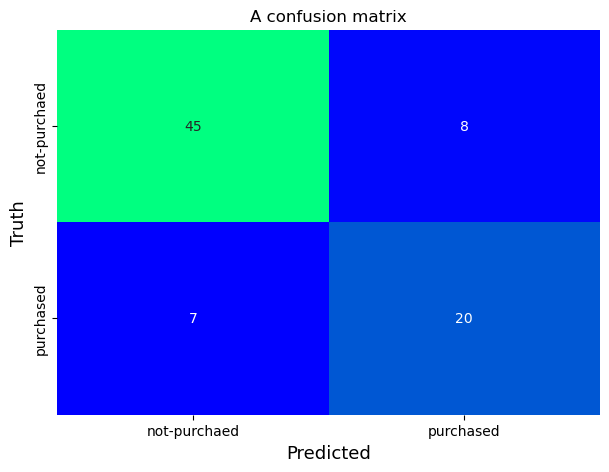

In [139]:
ConfusionMatrix(y_test, xgbboostmodel_prediction, label= ["not-purchaed", "purchased"])

## Interpretation of the XGBoost model evaluation performance

There are 45 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.

There are 21 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance.

There are 6 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.

There are 8 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.

## Evaluation metrics

We are going to check the **accuracy** and **F1** score of them model.

**We can check the accuracy by using:**

In [141]:
metrics.accuracy_score(y_test, xgbboostmodel_prediction)

0.8125

The accuracy of the model is $81.25\%$

**We can check the F1 score by using:**

In [144]:
metrics.f1_score(y_test, xgbboostmodel_prediction)

0.7272727272727273

The F1 score of the model is $72.7\%$

As you can see, this model seems good in predicting whether a patient will buy insurance or not.

## Support Vector Machine (SVM)

Let's train a Support Vector Machine model with our training data. We need to import the Support Vector Machine model from the sklearn module

In [147]:
from sklearn.svm import SVC

SVMmodel = SVC()

SVMmodel.fit(X_train, y_train)

SVC()

`SVMmodel.fit()` trained the Support Vector Machine on the training data. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [149]:
SVMmodel_prediction = SVMmodel.predict(X_test)

You can call on `SVMmodel_prediction` to see what has been predicted.

In [151]:
SVMmodel_prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

By using the `ConfusionMatrix()` function, we can see how the model performed:

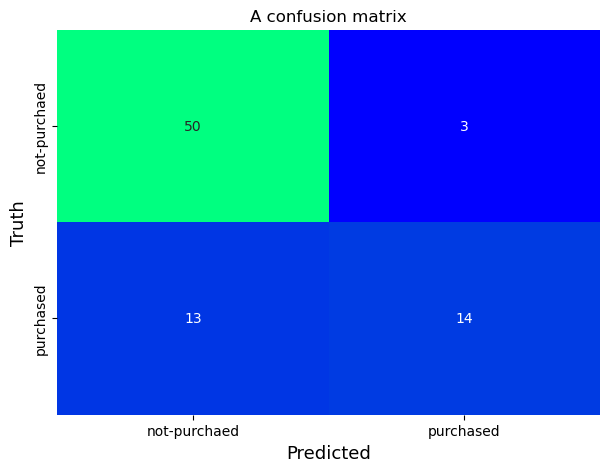

In [153]:
ConfusionMatrix(y_test, SVMmodel_prediction, label= ["not-purchaed", "purchased"])

## Interpretation of the Support Vector model evaluation performance

There are 50 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.

There are 14 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance.

There are 13 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.

There are 3 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.

## Evaluation metrics

We are going to check the **accuracy** and **F1** score of the model. 

**We can check the accuracy by using:**

In [155]:
metrics.accuracy_score(y_test, SVMmodel_prediction)

0.8

The accuracy of the model is $80\%$

**We can check the F1 score by using:**

In [157]:
metrics.f1_score(y_test, SVMmodel_prediction)

0.6363636363636364

The F1 score of the model is $63.6\%$

As you can see, this model seems good in predicting whether a patient will buy insurance or not.

In [56]:
## Models Summary

+-----------------------+----------------------+-----------------------+
| Model (s)             | Accuracy             | F1-score              |
+=======================+======================+=======================+
| Logistic regression   | 66.25                | 0                     |
+-----------------------+----------------------+-----------------------+
| Naive Bayes           | 85                   | 76.92                 |
+-----------------------+----------------------+-----------------------+
| Random Forest         | 83.75                | 77.97                 |
+-----------------------+----------------------+-----------------------+
| XGBoost               | 82.5                 | 75                    |
+-----------------------+----------------------+-----------------------+
| SVM                   | 80                   | 63.63                 |
+-----------------------+----------------------+-----------------------+

Having train all the five (5) models, we can see that the best model that can accurately predict whether a customer will buy the insurance or not is the Random Forest Model.

## Class Activities

## Importing Scikit-learn Module

Use the following models to predict whether a customer will buy insurance or not. Your teacher has also included how to import those models for you.

* **K Nearest Neighbor**: `from sklearn.neighbors import KNeighborsClassifier`

* **Decision Trees Classifier**: `from sklearn.tree import DecisionTreeClassifier`

* **Gradient Boost Classifier**: `from sklearn.ensemble import GradientBoostingClassifier`

Which of the three (3) model is the best in term of the F1 score?

### Saving the best performing model

In [159]:
import pickle

filename = 'naivebayes_model.sav'

# Save the model to disk
pickle.dump(naivemodel, open(filename, 'wb'))